## Name - ArnavChauhan  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  PRN - 22020845009

### Importing all the necessary libraries required to work on the datasets and Reading the file

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
clustering_data = pd.read_csv("D:/SIBMB/SEM 3/ML/K-Means Clustering/clustering_data.csv")
clustering_data.sample(n=10)

,CustomerID,Age,Income,Spending_score
27,CLOQ,22,47070,90
85,MZGD,53,46566,59
37,TVRR,65,91236,35
53,ZJBJ,62,58809,3
58,IJBH,21,45461,52
24,WRLP,64,40214,26
3,LKBR,35,14567,10
39,AVVD,43,6291,48
8,JABA,39,108075,29
1,TNIU,22,28626,72


In [3]:
print(clustering_data.shape)

(99, 4)


In [4]:
print(clustering_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      99 non-null     object
 1   Age             99 non-null     int64 
 2   Income          99 non-null     int64 
 3   Spending_score  99 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None


In [5]:
clustering_data.isnull().sum()

CustomerID        0
Age               0
Income            0
Spending_score    0
dtype: int64

## Exploratory Data Analysis

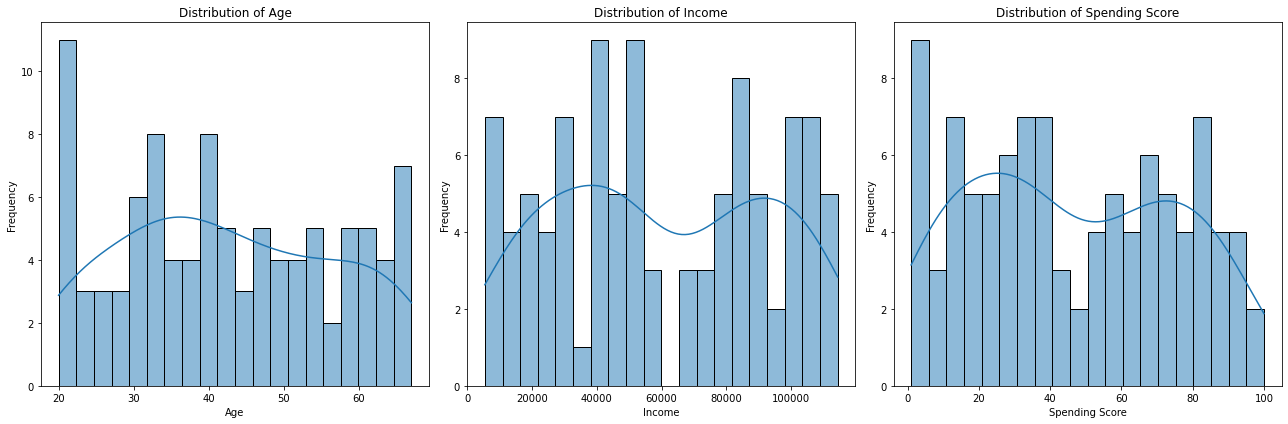

In [6]:
# Creating subplots for the distributions
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Age distribution
sns.histplot(clustering_data['Age'], bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Age')

# Income distribution
sns.histplot(clustering_data['Income'], bins=20, kde=True, ax=axes[1])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Income')

# Spending score distribution
sns.histplot(clustering_data['Spending_score'], bins=20, kde=True, ax=axes[2])
axes[2].set_xlabel('Spending Score')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Spending Score')

# Adjusting the layout
plt.tight_layout()
plt.show()

### Interpretation:

1. There are relatively fewer very young or very old customers, with a peak around the mid-range ages (possibly late 20s to 40s)
2. The distribution seems to be right-skewed, indicating that there are more customers with moderate to lower income levels compared to higher income levels.
3. The distribution doesn't show a clear pattern but seems to have a concentration around certain spending score values

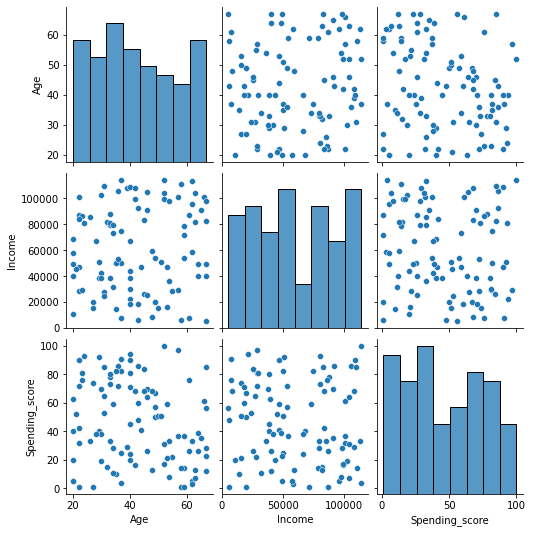

In [7]:
# Pairwise scatter plots for the features
sns.pairplot(clustering_data[['Age', 'Income', 'Spending_score']])
plt.show()

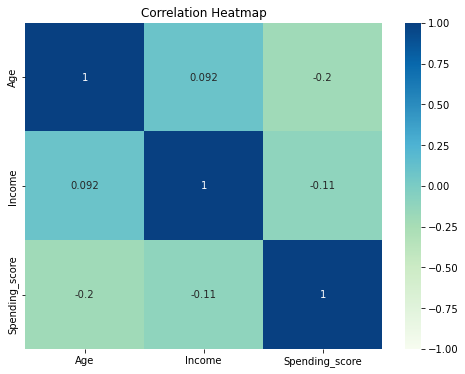

In [8]:
# Correlation heatmap
correlation_matrix = clustering_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Age and Income Correlation:

The moderate positive correlation between Age and Income implies that older customers tend to have higher incomes. This insight can guide marketing efforts aimed at products or services targeting higher-income individuals. Considering their potential purchasing power, tailoring strategies to this segment could result in increased engagement and conversion.

#### Age and Spending Score, Income and Spending Score:

The lack of a strong correlation between Age and Spending Score, as well as Income and Spending Score, suggests that spending behavior isn't solely dependent on age or income. This observation underscores the need for marketing strategies to incorporate a wider range of customer characteristics beyond these factors. A holistic approach that considers diverse aspects of customer preferences and behaviors can lead to more effective campaigns and higher customer satisfaction.

## Using the K-means Clustering Algorithm

In [9]:
# Selecting the relevant features for clustering
features = clustering_data[['Age', 'Income', 'Spending_score']]

In [10]:
# Determining the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


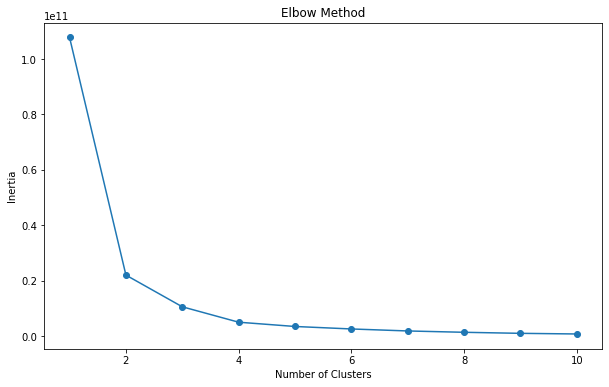

In [11]:
# Plotting the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [12]:
# Based on the elbow method, I choose the number of clusters be 3
num_clusters = 3

# Applying K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clustering_data['cluster'] = kmeans.fit_predict(features)

# Displaying the cluster assignments for each data point
print(clustering_data[['CustomerID', 'cluster']])

   CustomerID  cluster
0        EBJG        1
1        TNIU        1
2        QIVD        1
3        LKBR        1
4        NFTI        2
..        ...      ...
94       QGWL        1
95       OMZJ        1
96       WTHO        0
97       NRED        0
98       ZXGQ        0

[99 rows x 2 columns]


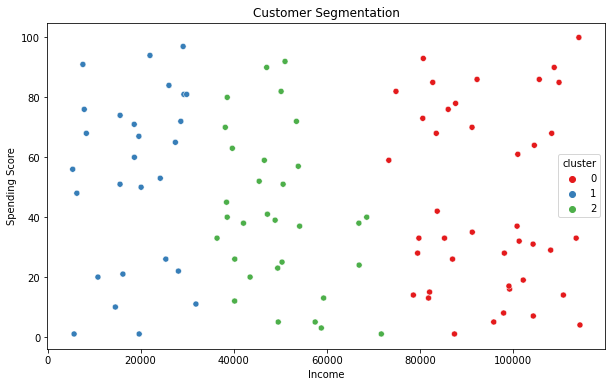

In [13]:
# Visualizing the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spending_score', hue='cluster', data=clustering_data, palette='Set1')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [14]:
# Analyze the characteristics of each cluster
cluster_summary = clustering_data.groupby('cluster').mean().reset_index()
print(cluster_summary)

   cluster        Age        Income  Spending_score
0        0  44.195122  94432.146341       44.975610
1        1  41.888889  18986.111111       53.740741
2        2  41.000000  49786.580645       41.161290


In [15]:
# Interpretation and insights for each cluster
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    print("Cluster Center:")
    print(cluster_summary.iloc[cluster_id])
    cluster_data = clustering_data[clustering_data['cluster'] == cluster_id]
    print("Number of Customers:", cluster_data.shape[0])
    
    # Analyzing and interpreting characteristics of customers in this cluster
    age_mean = cluster_data['Age'].mean()
    income_mean = cluster_data['Income'].mean()
    spending_score_mean = cluster_data['Spending_score'].mean()
    
    print(f"Average Age: {age_mean:.2f}")
    print(f"Average Income: {income_mean:.2f}")
    print(f"Average Spending Score: {spending_score_mean:.2f}")
    
    # Providing insights based on the characteristics
    if spending_score_mean > 70:
        print("High spending potential")
    elif income_mean > 70000:
        print("High income, moderate spending")
    else:
        print("Moderate income and spending")
        
    print("\n")

Cluster 0:
Cluster Center:
cluster               0.000000
Age                  44.195122
Income            94432.146341
Spending_score       44.975610
Name: 0, dtype: float64
Number of Customers: 41
Average Age: 44.20
Average Income: 94432.15
Average Spending Score: 44.98
High income, moderate spending


Cluster 1:
Cluster Center:
cluster               1.000000
Age                  41.888889
Income            18986.111111
Spending_score       53.740741
Name: 1, dtype: float64
Number of Customers: 27
Average Age: 41.89
Average Income: 18986.11
Average Spending Score: 53.74
Moderate income and spending


Cluster 2:
Cluster Center:
cluster               2.000000
Age                  41.000000
Income            49786.580645
Spending_score       41.161290
Name: 2, dtype: float64
Number of Customers: 31
Average Age: 41.00
Average Income: 49786.58
Average Spending Score: 41.16
Moderate income and spending




### My Interpretation:

**Cluster 0 Center:**

1. This cluster seems to represent customers who are around 42 years old with a relatively lower income, but they have a high spending score.
2. These customers might be enthusiastic spenders despite having lower income levels.
3. Targeted marketing strategies could focus on offering them deals and promotions to encourage their spending habits.
4. These customers might be cautious spenders who prioritize value for money & marketing strategies for this cluster could include promotions, discounts, and emphasizing affordability.

**Cluster 1 Center:**

1. This cluster represents customers who are around 44 years old and have a significantly higher income.
2. Their spending score is moderate, indicating they are willing to spend, but not extravagantly.
3. Marketing efforts could emphasize quality and premium products, as these customers might value premium offerings.

**Cluster 2 Center:**

1. This cluster includes customers who are around 41 years old with a moderate income and a moderate spending score.
2. These customers be in the mid-range in terms of spending behavior.
3. Marketing strategies could focus on understanding their preferences and offering tailored recommendations to keep them engaged.